# **CS 181 HW5 Problem 2**
---

#### Initialize data:

In [2]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]         # select N datapoints
x = x.flatten(1).float().numpy()    # flatten the images and convert pixels from uint8 to float

  0%|          | 0/9912422 [00:00<?, ?it/s]

9913344it [00:03, 2790036.07it/s]                             


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


29696it [00:00, 14600170.15it/s]         


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




1649664it [00:00, 3985333.36it/s]                             
5120it [00:00, 5235211.23it/s]          

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



#### PCA Implementation

In [52]:
def pca(x, num_comps=500):
    svd = np.linalg.svd(x - np.mean(x, axis = 0)) # zero out x before svd
    top_eigvals = svd[1][:num_comps] ** 2 / x.shape[0]
    top_pcomps = svd[2][:num_comps]
    return top_eigvals, top_pcomps

#### Cumulative Fraction of Variance

In [53]:
def calc_cfvs(eigvals):
    cumsum = np.cumsum(eigvals)
    return cumsum / cumsum[-1]

#### Mean Squared L2 norm Reconstruction Loss

In [76]:
def calc_errs(x, pcomps):
    zero_x = x - np.mean(x, axis = 0)
    err_mean = np.sum(zero_x ** 2) / x.shape[0]
    err_pcomp = np.sum((zero_x - (zero_x @ pcomps[:10].T @ pcomps[:10])) ** 2) / x.shape[0]
    return err_mean, err_pcomp

#### Plot and print errors:

In [77]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.png')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.png')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.png')

Reconstruction error (using mean): 3.436021e+06
Reconstruction error (using mean and top 10 pcomps): 1.731316e+06


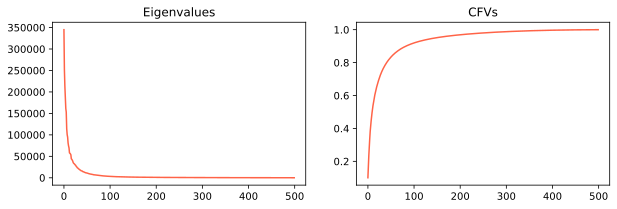

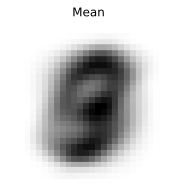

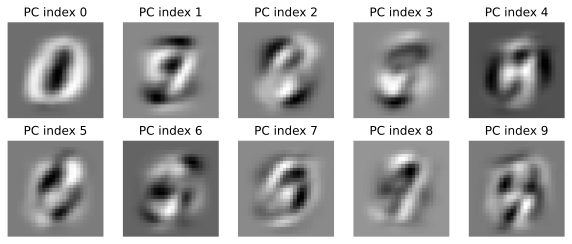

In [78]:
# do PCA
eigvals, pcomps = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, np.mean(x, axis = 0), pcomps)


In [79]:
np.sum(eigvals)

3433955.8